In [134]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

def parser(x):
    return datetime.strptime(x,'%m/%Y')

df = pd.read_csv('D:\WeatherFiles/Ampara.csv',parse_dates=[0],date_parser=parser)

In [135]:
df = df.set_index('Date')

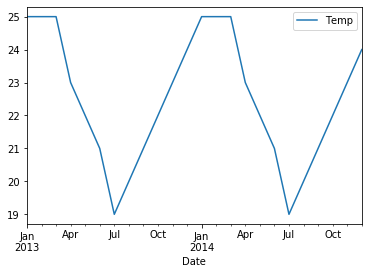

In [136]:
df.plot()

In [137]:
df.size

24

In [138]:
train, test = df[:18], df[18:]

In [139]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [140]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [141]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [142]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
1/1 [==============================] - 0s 357ms/step - loss: 0.6219
Epoch 2/90
1/1 [==============================] - 0s 24ms/step - loss: 0.5908
Epoch 3/90
1/1 [==============================] - 0s 14ms/step - loss: 0.5483
Epoch 4/90
1/1 [==============================] - 0s 14ms/step - loss: 0.4945
Epoch 5/90
1/1 [==============================] - 0s 15ms/step - loss: 0.4563
Epoch 6/90
1/1 [==============================] - 0s 15ms/step - loss: 0.4059
Epoch 7/90
1/1 [==============================] - 0s 9ms/step - loss: 0.3577
Epoch 8/90
1/1 [==============================] - 0s 14ms/step - loss: 0.3062
Epoch 9/90
1/1 [==============================] - 0s 20ms/step - loss: 0.2699
Epoch 10/90
1/1 [==============================] - 0s 11ms/step - loss: 0.2241
Epoch 11/90
1/1 [==============================] - 0s 8ms/step - loss: 0.1714
Epoch 12/90
1/1 [==============================] - 0s 13ms/step - loss: 0.1269
Epoch 13/90
1/1 [==============================] - 0s 14ms/ste

In [143]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [144]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


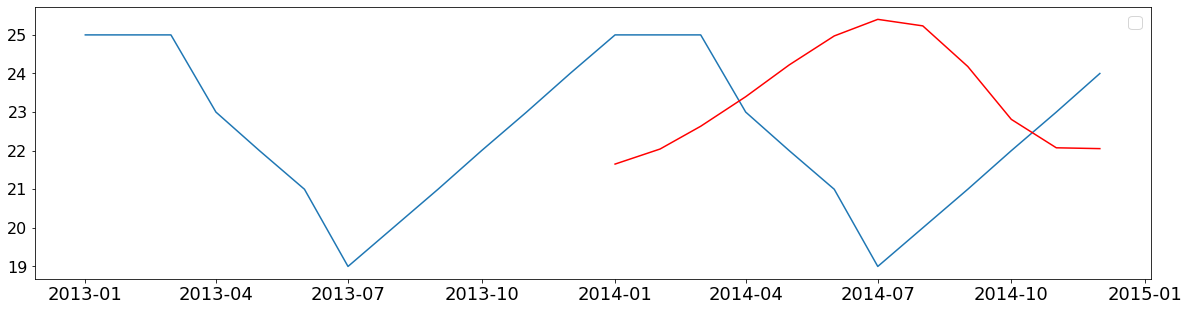

In [145]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Temp'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [146]:
df.tail()

,Temp
Date,
2014-08-01,20
2014-09-01,21
2014-10-01,22
2014-11-01,23
2014-12-01,24


In [147]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [3.29455278]


In [148]:
train = df

In [149]:
scaler.fit(train)
train = scaler.transform(train)

In [150]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [151]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
2/2 [==============================] - 0s 17ms/step - loss: 0.0425
Epoch 2/90
2/2 [==============================] - 0s 17ms/step - loss: 0.0406
Epoch 3/90
2/2 [==============================] - 0s 21ms/step - loss: 0.0486
Epoch 4/90
2/2 [==============================] - 0s 18ms/step - loss: 0.0427
Epoch 5/90
2/2 [==============================] - 0s 15ms/step - loss: 0.0379
Epoch 6/90
2/2 [==============================] - 0s 14ms/step - loss: 0.0437
Epoch 7/90
2/2 [==============================] - 0s 15ms/step - loss: 0.0182
Epoch 8/90
2/2 [==============================] - 0s 21ms/step - loss: 0.0343
Epoch 9/90
2/2 [==============================] - 0s 15ms/step - loss: 0.0276
Epoch 10/90
2/2 [==============================] - 0s 19ms/step - loss: 0.0280
Epoch 11/90
2/2 [==============================] - 0s 19ms/step - loss: 0.0294
Epoch 12/90
2/2 [==============================] - 0s 40ms/step - loss: 0.0139
Epoch 13/90
2/2 [==============================] - 0s 29ms/st

In [152]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [153]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [154]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


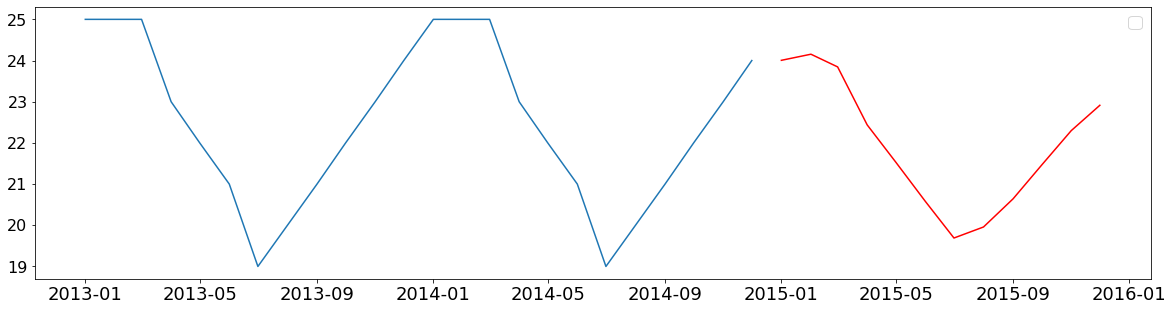

In [155]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['Temp'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [158]:
df_proj.tail()

,Temp,Prediction
2015-08-01,NaN,19.958310
2015-09-01,NaN,20.641960
2015-10-01,NaN,21.462323
2015-11-01,NaN,22.297922
2015-12-01,NaN,22.913508
